In [3]:
from NSEDownload import stocks
import pandas as pd
import numpy as np

In [25]:
# pip3 install nsetools
from nsetools import Nse
nse = Nse()
all_stock_codes = nse.get_stock_codes()
# print(all_stock_codes)
stock_code_df = pd.DataFrame.from_dict(all_stock_codes, orient='index')
stock_code_df.head()
nse.is_valid_code('TCS')

True

In [47]:
df = stocks.get_data(stockSymbol="TCS", start_date = '1-4-2010', end_date = '20-7-2021')

TCS


In [48]:
df.index = pd.to_datetime(df.index).strftime('%Y-%m-%d')


df=df.sort_index()
# df=df.reset_index()
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,
Date,,,,,,,,,,,,,,,
2010-04-01,TCS,EQ,780.65,786.35,809.8,782.10,808.0,807.80,798.67,2890716,2.308728e+09,-,1443668,49.94,
2010-04-05,TCS,EQ,807.80,817.00,817.0,799.25,803.0,803.35,804.15,1500918,1.206964e+09,-,550058,36.65,
2010-04-06,TCS,EQ,803.35,808.90,808.9,792.15,796.0,796.05,798.23,1851183,1.477678e+09,-,849373,45.88,
2010-04-07,TCS,EQ,796.05,790.00,809.0,781.15,798.2,798.05,792.39,1512279,1.198317e+09,-,553408,36.59,
2010-04-08,TCS,EQ,798.05,796.00,807.5,790.00,795.1,799.45,802.48,2247219,1.803353e+09,-,1012272,45.05,


In [49]:
df.shape

(2807, 15)

In [50]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))


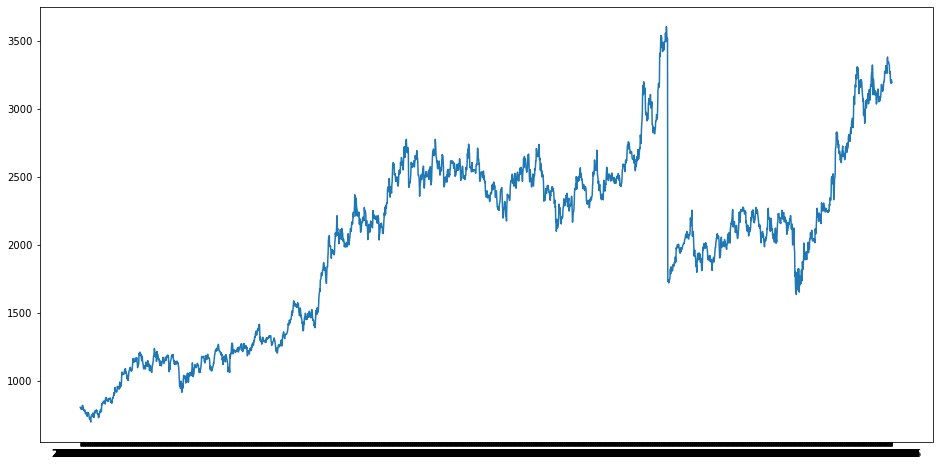

In [51]:

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close Price'], label='Close Price history')

In [52]:
df=df.reset_index()

from datetime import datetime
#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close Price'])
new_data.head()

for i in range(0,len(df)):
    new_data['Date'][i] = datetime.fromisoformat(df['Date'][i]).timestamp()
    new_data['Close Price'][i] = df['Close Price'][i]

new_data.head()

,Date,Close Price
0,1.27006e+09,807.8
1,1.27041e+09,803.35
2,1.27049e+09,796.05
3,1.27058e+09,798.05
4,1.27066e+09,799.45


In [57]:
#split into train and validation
train = new_data[:2100]
valid = new_data[2100:]

x_train = train.drop('Close Price', axis=1)
y_train = train['Close Price']
x_valid = valid.drop('Close Price', axis=1)
y_valid = valid['Close Price']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [58]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

1024.0572361026773

<ipython-input-59-967d917bff85>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-59-967d917bff85>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


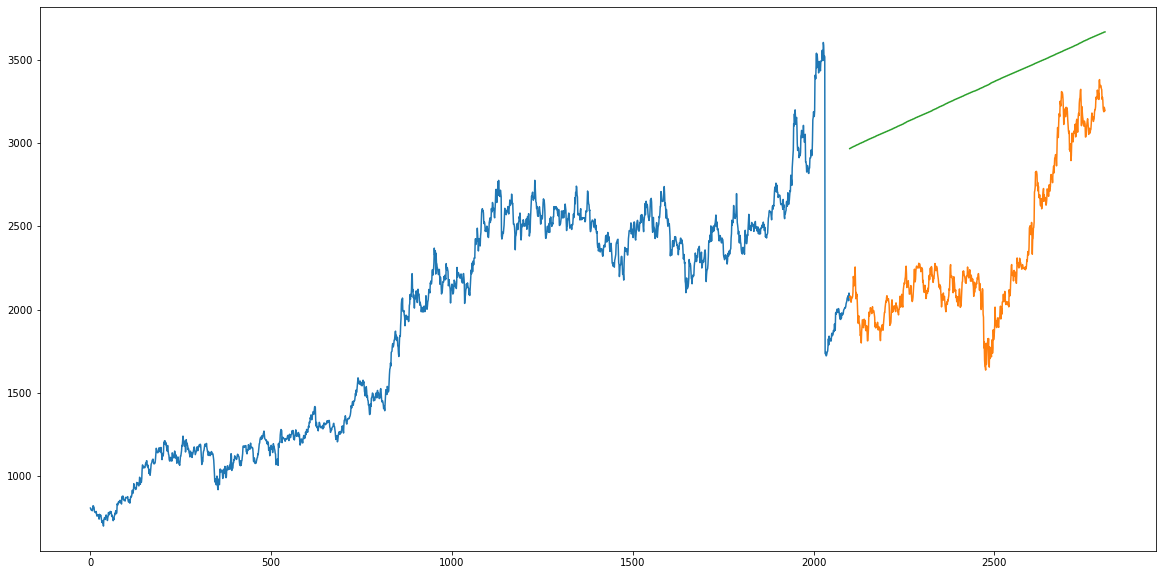

In [59]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[2100:].index
train.index = new_data[:2100].index

plt.plot(train['Close Price'])
plt.plot(valid[['Close Price', 'Predictions']])